In [1]:
#reading coco file
with open("coconew.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
#print("COCO Object Classes:")
#for i, class_name in enumerate(classes):
    #print(f"{i+1}. {class_name}")

[0.9586334228515625, 0.7369076013565063, 0.9790109395980835, 0.575599730014801, 0.8113883137702942]


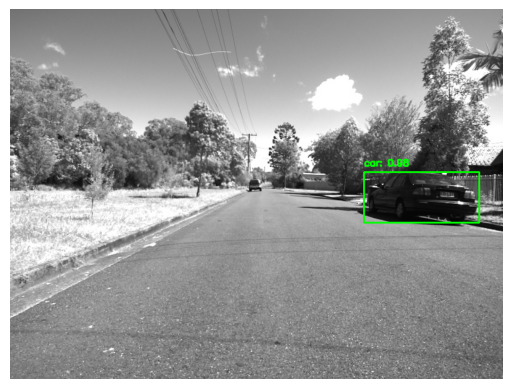

In [9]:
#object detection
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the YOLOv3 model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load the COCO class names
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load the image
img = cv2.imread("testimage_1.jpg")
#print(os.path.exists("testimage.jpg"))  # Confirm existence

output_layers = net.getUnconnectedOutLayersNames()

# Preprocess the image for YOLOv3
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

# Run object detection
net.setInput(blob)
outs = net.forward(output_layers)

# Extract detection information, apply NMS, and draw bounding boxes with labels (same as the video code)
# Extract detections
class_ids = []
confidences = []
boxes = []
box=[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3:  # Lowered confidence threshold
            center_x = int(detection[0] * img.shape[1])
            center_y = int(detection[1] * img.shape[0])
            width = int(detection[2] * img.shape[1])
            height = int(detection[3] * img.shape[0])
            x = int(center_x - width / 2)
            y = int(center_y - height / 2)
            boxes.append([x, y, width, height])
            confidences.append(float(confidence)) 
            class_ids.append(class_id)
            #print(len(boxes))
# Keep only the highest-scoring detection
if not confidences:
    print("No objects detected with sufficient confidence.")
else:
    print(confidences)
    try:  # Add the try-except block here
        index = np.argmax(confidences)
        box = boxes[index]
        confidence = confidences[index]
        class_id = class_ids[index]
        if box:
            #print(index)
            #print(img.shape)
            #print(box)
            # Draw bounding box and label
            label = f"{classes[class_id]}: {confidence:.2f}"
            cv2.rectangle(img, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), (0, 255, 0), 2)
            cv2.putText(img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    except IndexError:
        print("No objects detected with sufficient confidence.")

# Convert the image from BGR to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with detected objects
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()
